<a href="https://colab.research.google.com/github/federico2018lc/Evidencia-de-Aprendizaje-2-Sistema-ABM-Innovacion-de-datos-2025/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Primer EDA kaggle

In [232]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


In [233]:
df = pd.read_csv("bi.csv", encoding="latin1")

In [234]:
df.columns

Index(['fNAME', 'lNAME', 'Age', 'gender', 'country', 'residence', 'entryEXAM',
       'prevEducation', 'studyHOURS', 'Python', 'DB'],
      dtype='object')

['fNAME', 'lNAME', 'Age', 'gender', 'country', 'residence', 'entryEXAM',
       'prevEducation', 'studyHOURS', 'Python', 'DB']
       
Tenemos algunas columnas que no son necesarias, como fNAME lNAME

In [235]:
df.drop(columns=["fNAME", "lNAME"], inplace=True)

In [236]:
df.columns

Index(['Age', 'gender', 'country', 'residence', 'entryEXAM', 'prevEducation',
       'studyHOURS', 'Python', 'DB'],
      dtype='object')

Diferenciamos variables númericas y categoricas

In [237]:
df.dtypes

,0
Age,int64
gender,object
country,object
residence,object
entryEXAM,int64
prevEducation,object
studyHOURS,int64
Python,float64
DB,int64


object, float64, int64,

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            77 non-null     int64  
 1   gender         77 non-null     object 
 2   country        77 non-null     object 
 3   residence      77 non-null     object 
 4   entryEXAM      77 non-null     int64  
 5   prevEducation  77 non-null     object 
 6   studyHOURS     77 non-null     int64  
 7   Python         75 non-null     float64
 8   DB             77 non-null     int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 5.5+ KB


# Cleaning gender


In [239]:
print(df['gender'].value_counts())

gender
Female    41
Male      32
M          1
F          1
female     1
male       1
Name: count, dtype: int64


Estudiando los datos se analiza diferentes estrategias y se establecen tareas primordiales.
Encontramos inconsistencias en gender.
unificar F M female male

**Tarea obligatoria:** reemplazar primer letra por su mayuscula.

Vereficación: Ver como queda el `valuecounts()`

In [240]:
df.loc[df['gender'] == 'F', 'gender'] = 'Female'
df.loc[df['gender'] == 'M', 'gender'] = 'Male'

df.value_counts('gender')

,count
gender,
Female,42
Male,33
female,1
male,1


In [241]:
#las primeras letras en mayusculas
df['gender'] = df['gender'].str.capitalize()
df['gender'].value_counts()

,count
gender,
Female,43
Male,34


In [242]:
df.value_counts('gender')

,count
gender,
Female,43
Male,34


In [243]:
print(df['country'].value_counts())

country
Norway          47
Uganda           4
Kenya            3
Germany          3
Italy            2
Spain            2
Netherlands      2
Denmark          2
UK               2
Somali           2
Nigeria          2
France           2
norway           1
Norge            1
South Africa     1
Rsa              1
Name: count, dtype: int64


# Cleaning country

Estudiando los datos se analiza diferentes estrategias y se establecen tareas.

**Tarea obligatoria:** reemplazar primer letra por su mayuscula.

**Opción A**: clasificar los países por continente.

**Opcion B**: reemplazar los paises que no son norway, como otros paises. ya que son muy pocos por cada pais. y puede confundir o crear confusiones al modelo, por ejemplo si francia tiene 2 con alto puntaje, entonces podrian darse mensajes confuso como que el que 100% de los encuestados franceses tiene alta calificación y en norway solo llega al x%.

In [244]:
df['country'] = df['country'].str.capitalize()
print(df['country'].value_counts())

country
Norway          48
Uganda           4
Kenya            3
Germany          3
Denmark          2
Netherlands      2
Spain            2
Uk               2
Somali           2
Nigeria          2
Italy            2
France           2
Norge            1
Rsa              1
South africa     1
Name: count, dtype: int64


In [245]:
#limpieza extrama armo 2 categorias en países
df.loc[df['country'] != 'Norway', 'country'] = 'NO_Norway(other countries)'

In [246]:
df.value_counts('country')

,count
country,
Norway,48
NO_Norway(other countries),29


# Cleaning residenses residence



In [247]:
print(df['residence'].value_counts())

residence
Private         33
BI Residence    29
Sognsvann       12
BI-Residence     1
BIResidence      1
BI_Residence     1
Name: count, dtype: int64


In [248]:

df.loc[df['residence'] == 'BI-Residence', 'residence'] = 'BI Residence'
df.loc[df['residence'] == 'BIResidence', 'residence'] = 'BI Residence'
df.loc[df['residence'] == 'BI_Residence', 'residence'] = 'BI Residence'

In [249]:
df['residence'].value_counts()

,count
residence,
Private,33
BI Residence,32
Sognsvann,12


# cleaning prevEducation

In [250]:
df['prevEducation'].value_counts()

,count
prevEducation,
Bachelors,24
High School,18
Masters,16
Diploma,9
Doctorate,5
HighSchool,1
Barrrchelors,1
diploma,1
DIPLOMA,1


In [251]:
df['prevEducation'] = df['prevEducation'].str.capitalize()

In [252]:
df

,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,44,Female,Norway,Private,72,Masters,158,59.0,55
1,60,Male,NO_Norway(other countries),Private,79,Diploma,150,60.0,75
2,25,Male,NO_Norway(other countries),Sognsvann,55,Highschool,130,74.0,50
3,22,Female,NO_Norway(other countries),Sognsvann,40,High school,120,NaN,44
4,23,Female,NO_Norway(other countries),Sognsvann,65,High school,122,91.0,80
...,...,...,...,...,...,...,...,...,...
72,43,Female,NO_Norway(other countries),Private,80,Bachelors,150,75.0,43
73,31,Male,NO_Norway(other countries),Sognsvann,90,Masters,158,84.0,83
74,33,Female,NO_Norway(other countries),Sognsvann,96,Masters,158,85.0,90
75,35,Male,NO_Norway(other countries),Sognsvann,90,Masters,160,87.0,74


In [253]:
df['prevEducation'].value_counts()

,count
prevEducation,
Bachelors,24
High school,18
Masters,16
Diploma,11
Doctorate,5
Highschool,1
Barrrchelors,1
Diplomaaa,1


In [254]:
df.loc[df['prevEducation'] == 'Diplomaaa', 'prevEducation'] = 'Diploma'
df['prevEducation'].value_counts()

,count
prevEducation,
Bachelors,24
High school,18
Masters,16
Diploma,12
Doctorate,5
Highschool,1
Barrrchelors,1


In [255]:
df.loc[df['prevEducation'] == 'Highschool', 'prevEducation'] = 'High school'
df.loc[df['prevEducation'] == 'Barrrchelors', 'prevEducation'] = 'Bachelors'
df['prevEducation'].value_counts()

,count
prevEducation,
Bachelors,25
High school,19
Masters,16
Diploma,12
Doctorate,5


# Updeat  

In [256]:
for col in df.select_dtypes(include='object').columns:
    print(f"Value counts for column: {col}")
    print(df[col].value_counts())
    print("-" * 40)

Value counts for column: gender
gender
Female    43
Male      34
Name: count, dtype: int64
----------------------------------------
Value counts for column: country
country
Norway                        48
NO_Norway(other countries)    29
Name: count, dtype: int64
----------------------------------------
Value counts for column: residence
residence
Private         33
BI Residence    32
Sognsvann       12
Name: count, dtype: int64
----------------------------------------
Value counts for column: prevEducation
prevEducation
Bachelors      25
High school    19
Masters        16
Diploma        12
Doctorate       5
Name: count, dtype: int64
----------------------------------------


In [257]:
df.columns

Index(['Age', 'gender', 'country', 'residence', 'entryEXAM', 'prevEducation',
       'studyHOURS', 'Python', 'DB'],
      dtype='object')

# Analisis

In [258]:
#datos duplicados: 0
print(df.duplicated().sum())

0


In [259]:
df.isnull().sum() #faltan solo 2 datos en python (se reemplaza por la media o se elimina o se deja así para ver de completar ese valor con ML)

,0
Age,0
gender,0
country,0
residence,0
entryEXAM,0
prevEducation,0
studyHOURS,0
Python,2
DB,0


# Agrupamos Age

In [260]:
df['Age'].value_counts()

,count
Age,
25,5
31,5
22,4
33,4
35,4
27,3
43,3
29,3
26,3


In [261]:
df['Age'].describe()

,Age
count,77.000000
mean,35.207792
std,10.341966
min,21.000000
25%,27.000000
50%,33.000000
75%,42.000000
max,71.000000


In [262]:
def categorize_age(age):
    if 20 <= age <= 29:
        return '20-29 años'
    elif 30 <= age <= 39:
        return '30-39 años'
    elif 40 <= age <= 49:
        return '40-49 años'
    elif 50 <= age <= 59:
        return '50-59 años'
    else:
        return '60+ años'

df['Age'] = df['Age'].apply(categorize_age)
df['Age'].value_counts()

,count
Age,
30-39 años,28
20-29 años,26
40-49 años,17
60+ años,3
50-59 años,3


#sugerencias de gráficos

In [265]:
display(df[['Age', 'prevEducation']])

,Age,prevEducation
0,40-49 años,Masters
1,60+ años,Diploma
2,20-29 años,High school
3,20-29 años,High school
4,20-29 años,High school
...,...,...
72,40-49 años,Bachelors
73,30-39 años,Masters
74,30-39 años,Masters
75,30-39 años,Masters


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Age').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('prevEducation').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['prevEducation'].value_counts()
    for x_label, grp in _df_2.groupby('Age')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Age')
_ = plt.ylabel('prevEducation')

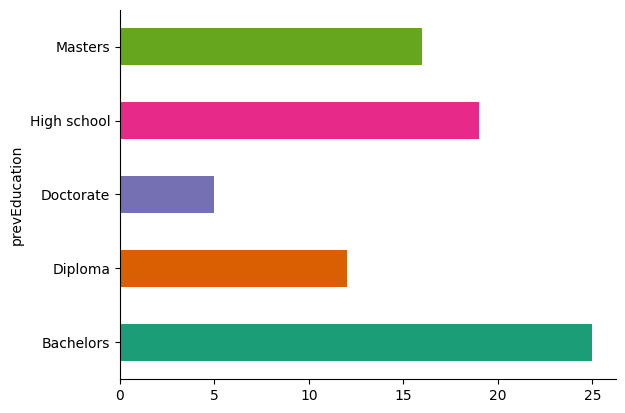

In [267]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('prevEducation').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

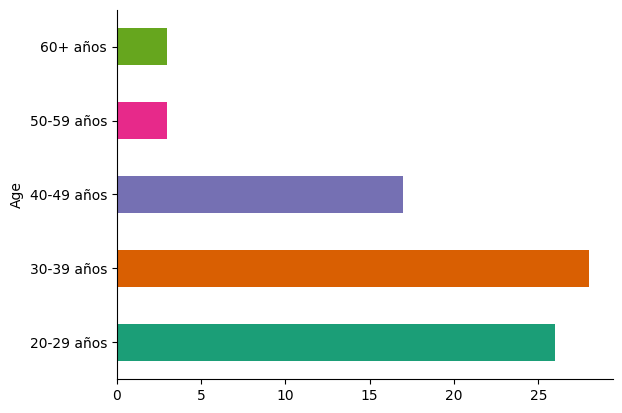

In [266]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Age').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# gráficos


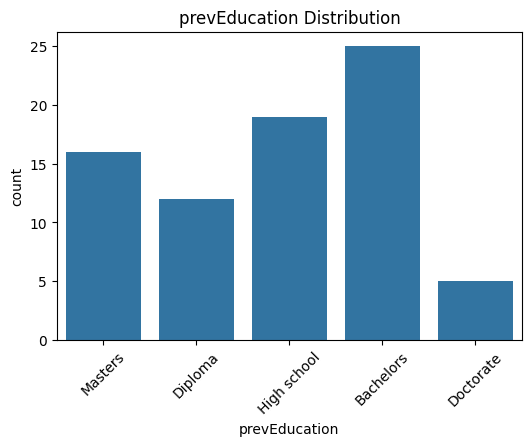

In [270]:
plt.figure(figsize=(6,4))
sns.countplot(x="prevEducation", data=df)
plt.title("prevEducation Distribution")
plt.xticks(rotation=45)
plt.show()

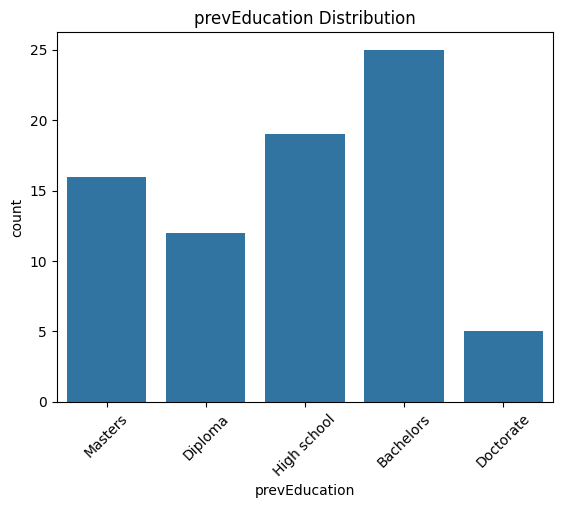

In [274]:
#plt.figure(figsize=(6,4))
sns.countplot(x="prevEducation", data=df)
plt.title("prevEducation Distribution")
plt.xticks(rotation=45)
plt.show()

In [276]:
df.columns

Index(['Age', 'gender', 'country', 'residence', 'entryEXAM', 'prevEducation',
       'studyHOURS', 'Python', 'DB'],
      dtype='object')

In [281]:
def plot_categorical_column(i):
  sns.countplot(x=i, data=df)
  plt.title(i)
  plt.xticks(rotation=45)
  plt.show()

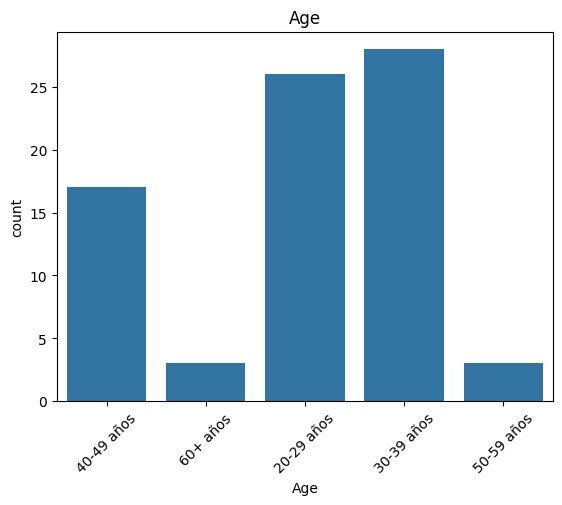

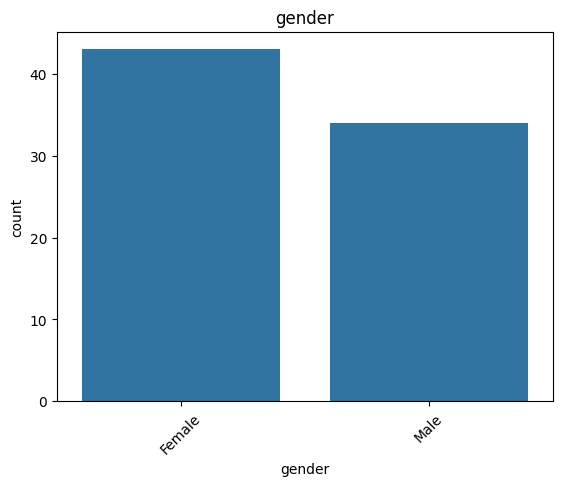

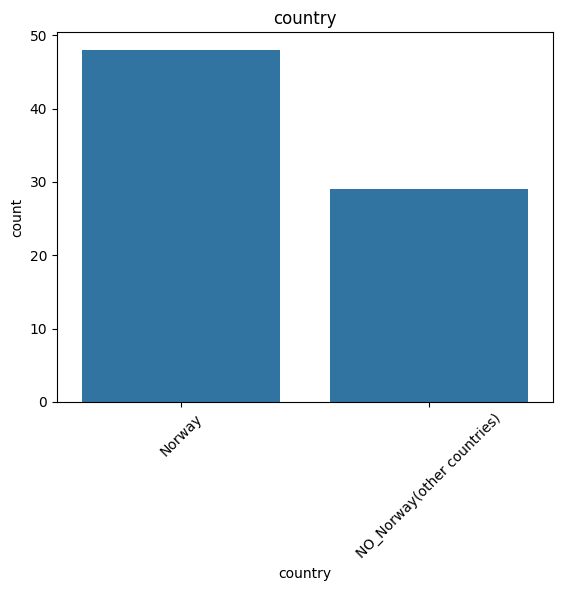

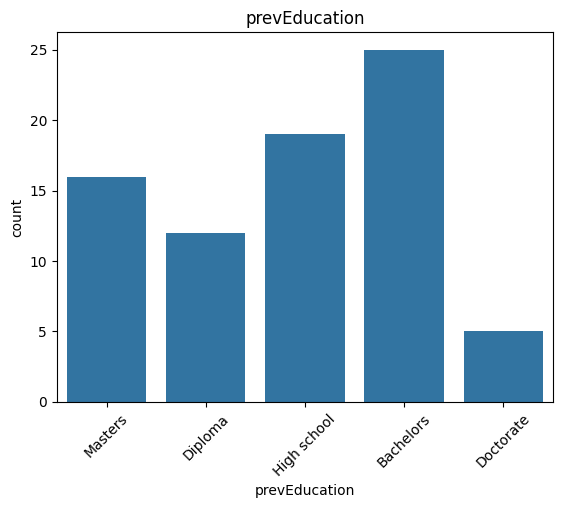

In [282]:
c=['Age','gender','country','prevEducation']
for i in c:
  plot_categorical_column(i)

# Gráficos agrupados

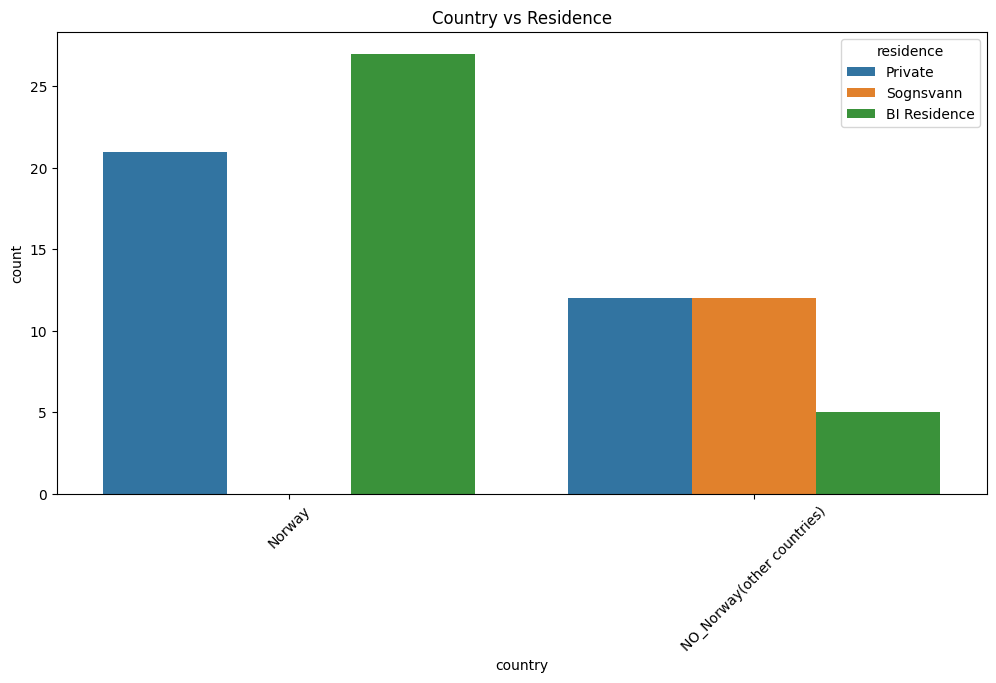

In [290]:
plt.figure(figsize=(12,6))
sns.countplot(x="country", hue="residence", data=df)
plt.title("Country vs Residence")
plt.xticks(rotation=45)
plt.show()
#Investigar que es BI residence y sognsvann

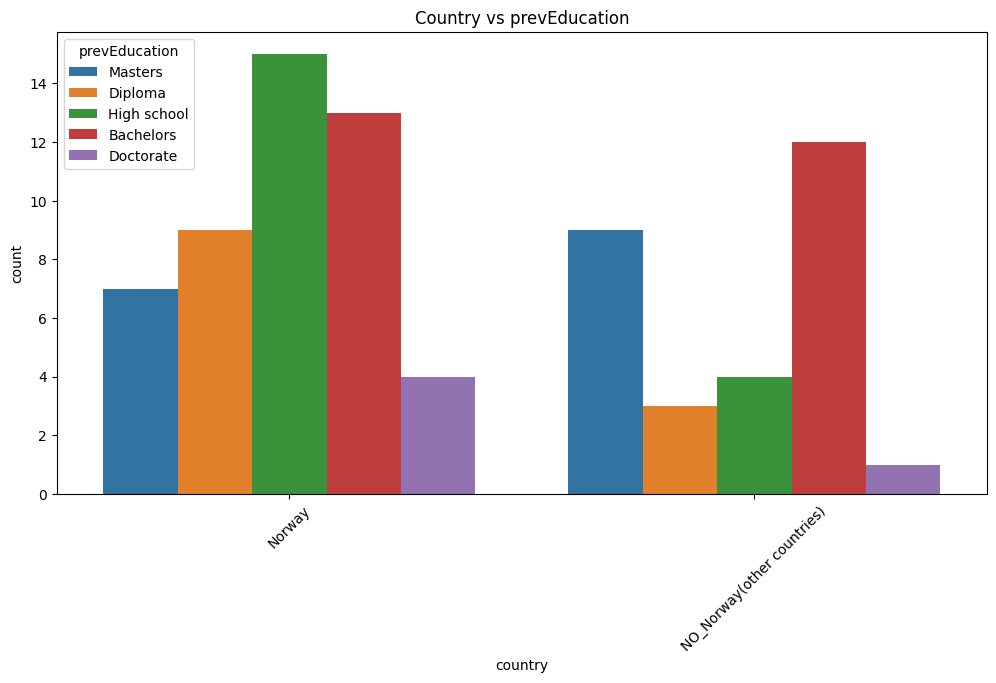

In [291]:
plt.figure(figsize=(12,6))
sns.countplot(x="country", hue="prevEducation", data=df)
plt.title("Country vs prevEducation")
plt.xticks(rotation=45)
plt.show()

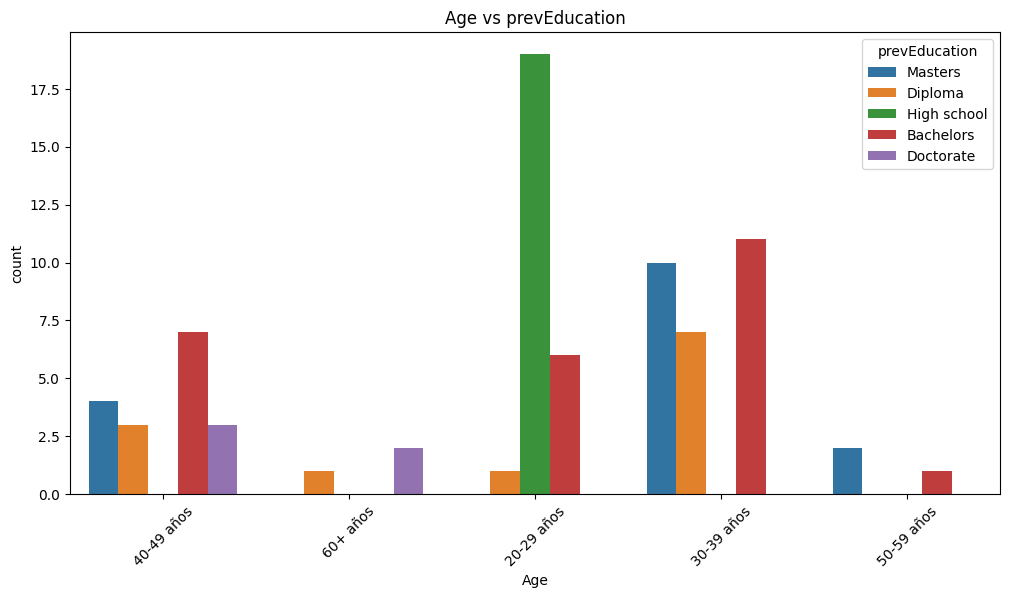

In [293]:
plt.figure(figsize=(12,6))
sns.countplot(x="Age", hue="prevEducation", data=df)
plt.title("Age vs prevEducation")
plt.xticks(rotation=45)
plt.show()

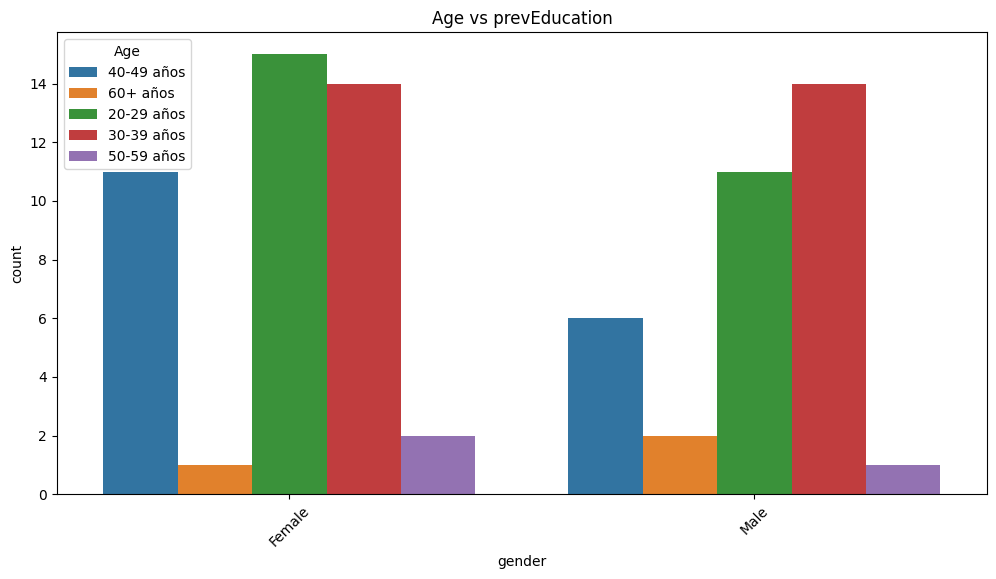

In [294]:
plt.figure(figsize=(12,6))
sns.countplot(x="gender", hue="Age", data=df)
plt.title("Age vs prevEducation")
plt.xticks(rotation=45)
plt.show()

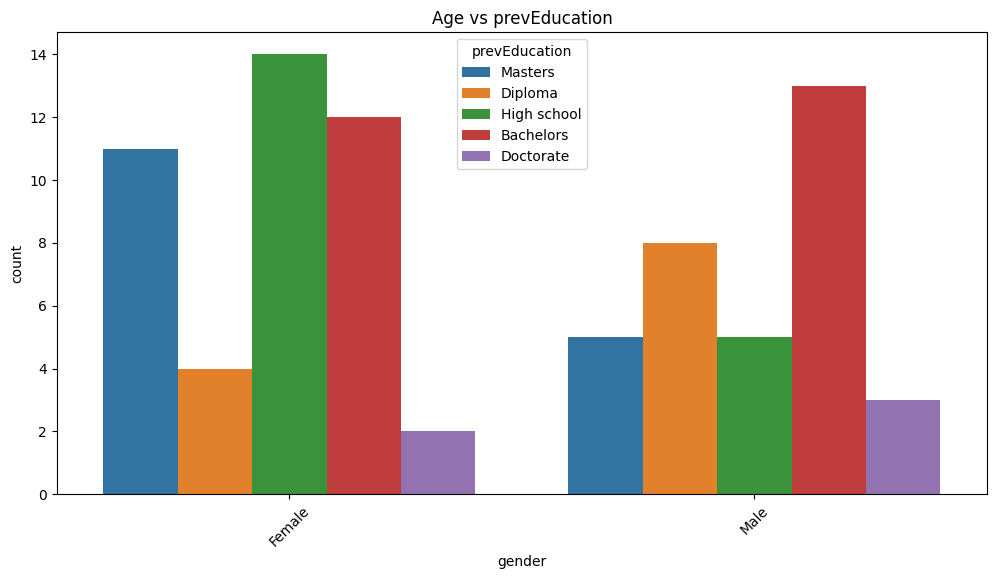

In [295]:
plt.figure(figsize=(12,6))
sns.countplot(x="gender", hue="prevEducation", data=df)
plt.title("Age vs prevEducation")
plt.xticks(rotation=45)
plt.show()

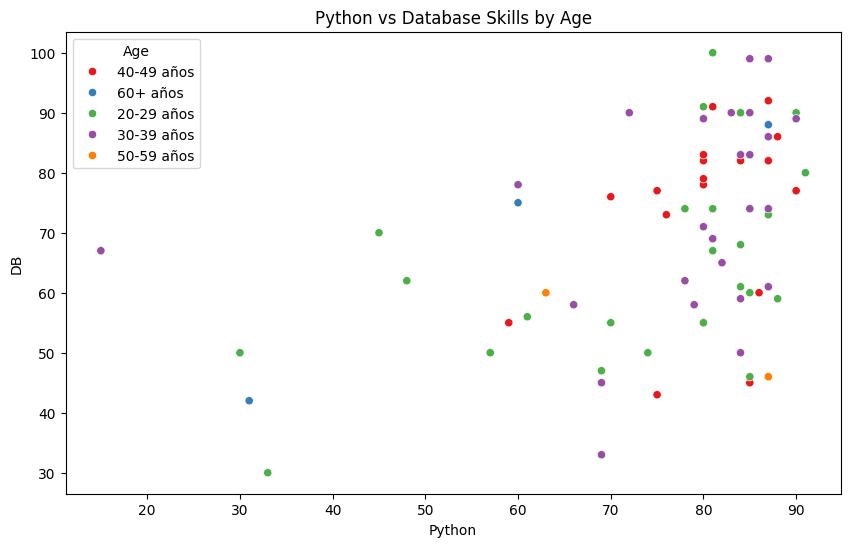

In [300]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Python", y="DB", hue="Age", data=df, palette="Set1")
plt.title("Python vs Database Skills by Age")
plt.show()

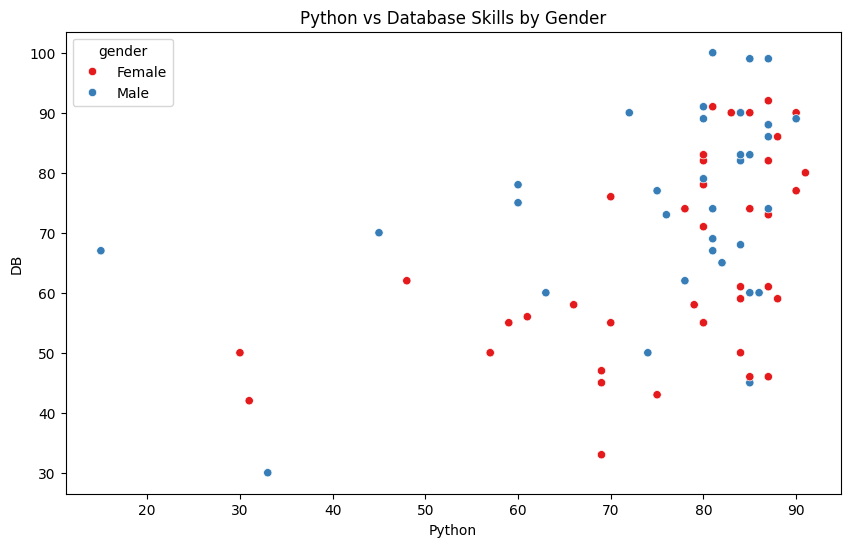

In [299]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Python", y="DB", hue="gender", data=df, palette="Set1")
plt.title("Python vs Database Skills by Gender")
plt.show()

Text(0, 0.5, 'Database')

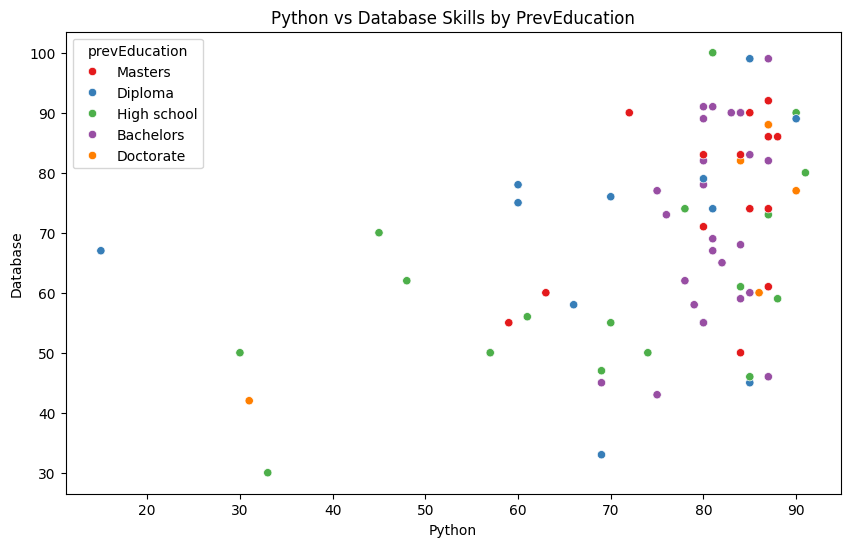

In [298]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Python", y="DB", hue="prevEducation", data=df, palette="Set1")
plt.title("Python vs Database Skills by PrevEducation")
plt.xlabel("Python")
plt.ylabel("Database")


# estadística `df.describe()`

In [285]:
df.columns

Index(['Age', 'gender', 'country', 'residence', 'entryEXAM', 'prevEducation',
       'studyHOURS', 'Python', 'DB'],
      dtype='object')

In [286]:
df.describe()

,entryEXAM,studyHOURS,Python,DB
count,77.000000,77.000000,75.000000,77.000000
mean,76.753247,149.714286,75.853333,69.467532
std,16.475784,12.743272,15.410328,17.033701
min,28.000000,114.000000,15.000000,30.000000
25%,69.000000,144.000000,71.000000,56.000000
50%,80.000000,156.000000,81.000000,71.000000
75%,90.000000,158.000000,85.000000,83.000000
max,98.000000,160.000000,91.000000,100.000000


In [288]:
df.head()

,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,40-49 años,Female,Norway,Private,72,Masters,158,59.0,55
1,60+ años,Male,NO_Norway(other countries),Private,79,Diploma,150,60.0,75
2,20-29 años,Male,NO_Norway(other countries),Sognsvann,55,High school,130,74.0,50
3,20-29 años,Female,NO_Norway(other countries),Sognsvann,40,High school,120,NaN,44
4,20-29 años,Female,NO_Norway(other countries),Sognsvann,65,High school,122,91.0,80


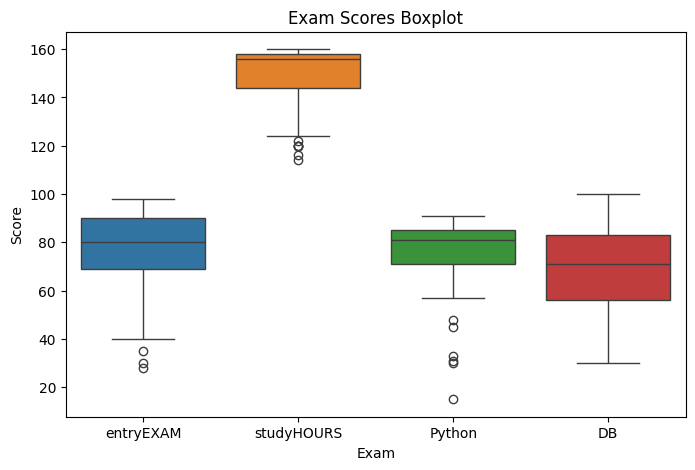

In [304]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df[["entryEXAM","studyHOURS","Python","DB"]])
plt.title("Exam Scores Boxplot")
plt.xlabel("Exam")
plt.ylabel("Score")
plt.show()


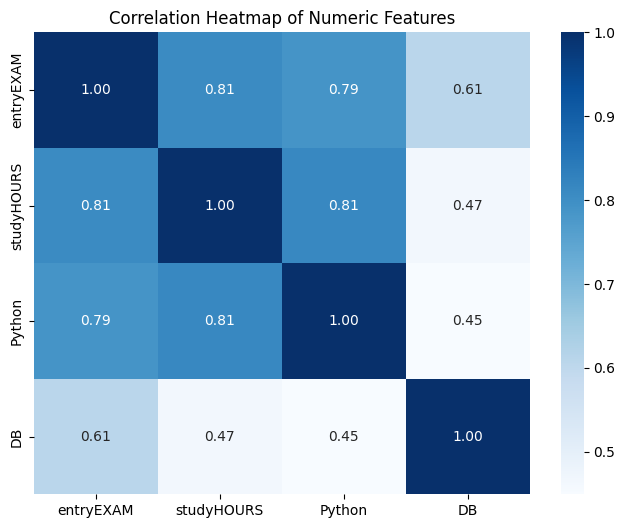

In [307]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['entryEXAM','studyHOURS','Python','DB']].corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

Se tendría que estandarizar las puntuaciones y clasificar las horas de estudio


In [308]:
df.head()

,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,40-49 años,Female,Norway,Private,72,Masters,158,59.0,55
1,60+ años,Male,NO_Norway(other countries),Private,79,Diploma,150,60.0,75
2,20-29 años,Male,NO_Norway(other countries),Sognsvann,55,High school,130,74.0,50
3,20-29 años,Female,NO_Norway(other countries),Sognsvann,40,High school,120,NaN,44
4,20-29 años,Female,NO_Norway(other countries),Sognsvann,65,High school,122,91.0,80


In [309]:
def categorize_studyHOURS(age):  #como el min 114 y max es 160
    if 110 <= age <= 129:
        return '110 a 129 horas'
    elif 130 <= age <= 149:
        return '130 a 149 horas'
    else:
        return '150 a 160 horas'

In [310]:
df['studyHOURS'] = df['studyHOURS'].apply(categorize_studyHOURS)
df['studyHOURS'].value_counts()

,count
studyHOURS,
150 a 160 horas,53
130 a 149 horas,16
110 a 129 horas,8


In [311]:
df.describe()

,entryEXAM,Python,DB
count,77.000000,75.000000,77.000000
mean,76.753247,75.853333,69.467532
std,16.475784,15.410328,17.033701
min,28.000000,15.000000,30.000000
25%,69.000000,71.000000,56.000000
50%,80.000000,81.000000,71.000000
75%,90.000000,85.000000,83.000000
max,98.000000,91.000000,100.000000


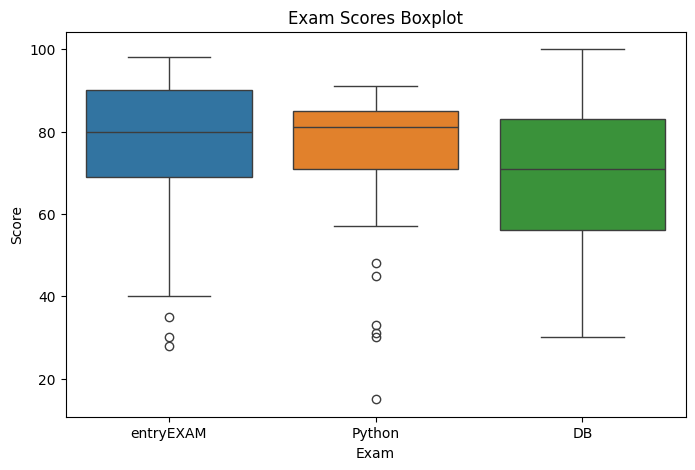

In [312]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df[["entryEXAM","Python","DB"]])
plt.title("Exam Scores Boxplot")
plt.xlabel("Exam")
plt.ylabel("Score")
plt.show()

# Distribuciones


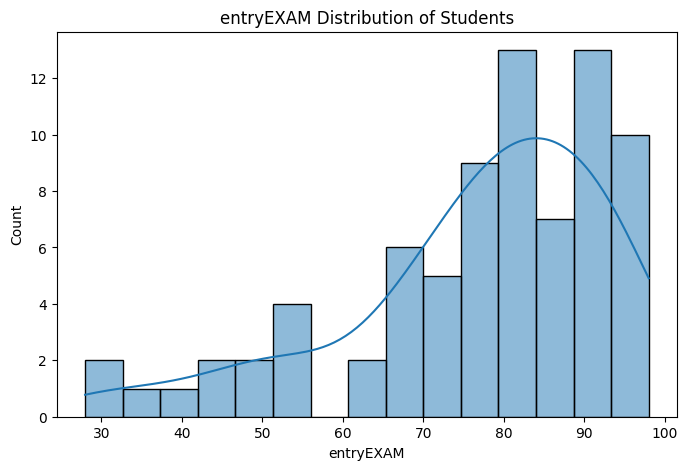

In [313]:
plt.figure(figsize=(8,5))
sns.histplot(df['entryEXAM'], bins=15, kde=True)
plt.title("entryEXAM Distribution of Students")
plt.xlabel("entryEXAM")
plt.ylabel("Count")
plt.show()

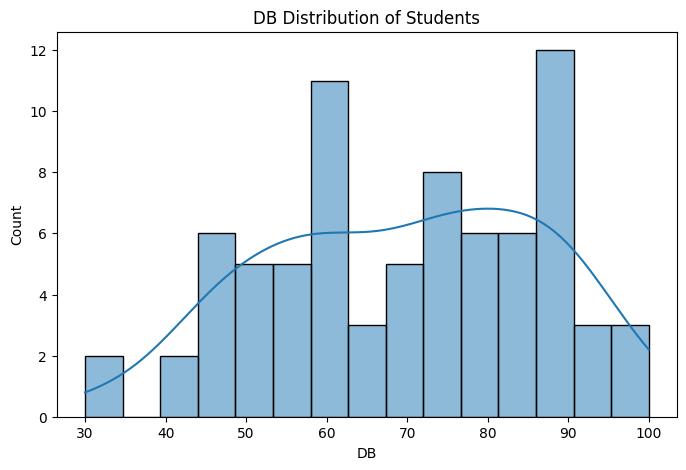

In [314]:
plt.figure(figsize=(8,5))
sns.histplot(df['DB'], bins=15, kde=True)
plt.title("DB Distribution of Students")
plt.xlabel("DB")
plt.ylabel("Count")
plt.show()

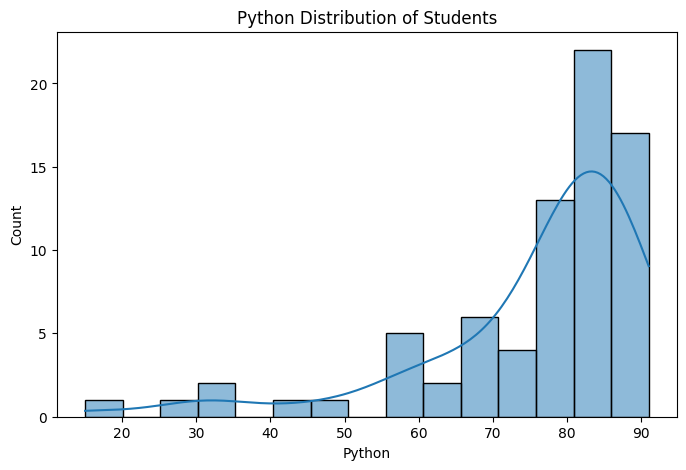

In [315]:
plt.figure(figsize=(8,5))
sns.histplot(df['Python'], bins=15, kde=True)
plt.title("Python Distribution of Students")
plt.xlabel("Python")
plt.ylabel("Count")
plt.show()

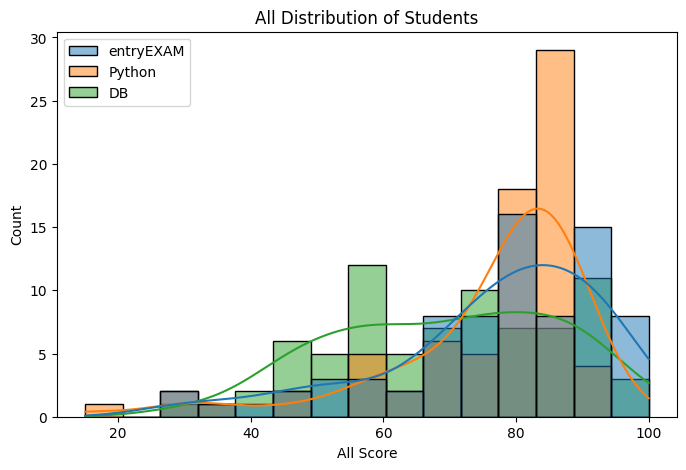

In [324]:
plt.figure(figsize=(8,5))
sns.histplot(df[["entryEXAM","Python","DB"]], bins=15, kde=True)
plt.title("All Distribution of Students")
plt.xlabel("All Score")
plt.ylabel("Count")
plt.show()

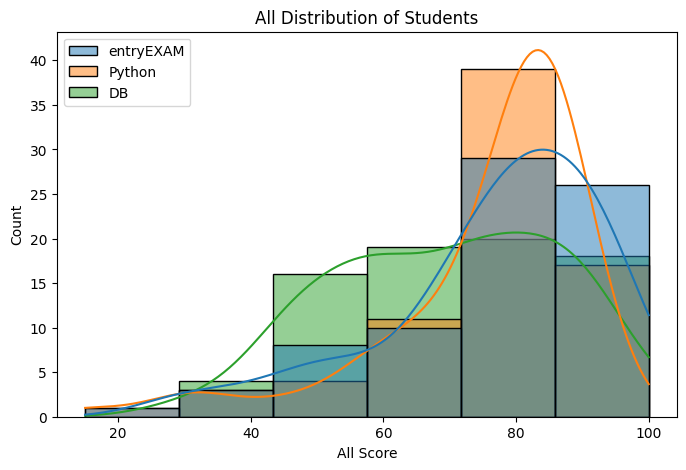

In [325]:
plt.figure(figsize=(8,5))
sns.histplot(df[["entryEXAM","Python","DB"]], bins=6, kde=True)
plt.title("All Distribution of Students")
plt.xlabel("All Score")
plt.ylabel("Count")
plt.show()

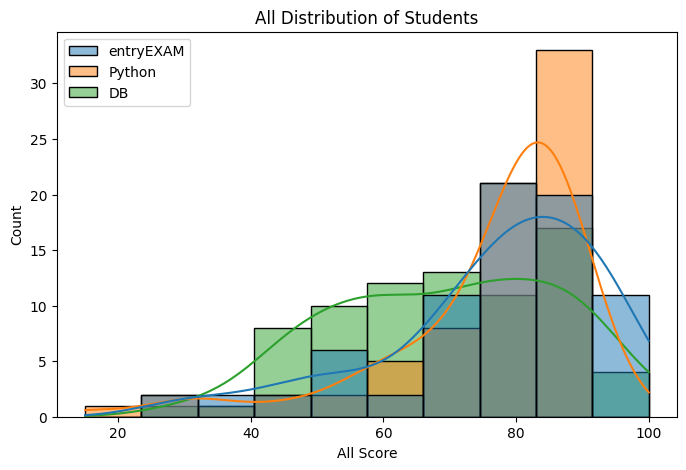

In [326]:
plt.figure(figsize=(8,5))
sns.histplot(df[["entryEXAM","Python","DB"]], bins=10, kde=True)
plt.title("All Distribution of Students")
plt.xlabel("All Score")
plt.ylabel("Count")
plt.show()

#Resumen

Limpiamos y agrupamos datos

In [327]:
for col in df.select_dtypes(include='object').columns:
    print(f"Value counts for column: {col}")
    print(df[col].value_counts())
    print("-" * 40)

Value counts for column: Age
Age
30-39 años    28
20-29 años    26
40-49 años    17
60+ años       3
50-59 años     3
Name: count, dtype: int64
----------------------------------------
Value counts for column: gender
gender
Female    43
Male      34
Name: count, dtype: int64
----------------------------------------
Value counts for column: country
country
Norway                        48
NO_Norway(other countries)    29
Name: count, dtype: int64
----------------------------------------
Value counts for column: residence
residence
Private         33
BI Residence    32
Sognsvann       12
Name: count, dtype: int64
----------------------------------------
Value counts for column: prevEducation
prevEducation
Bachelors      25
High school    19
Masters        16
Diploma        12
Doctorate       5
Name: count, dtype: int64
----------------------------------------
Value counts for column: studyHOURS
studyHOURS
150 a 160 horas    53
130 a 149 horas    16
110 a 129 horas     8
Name: count, dtyp

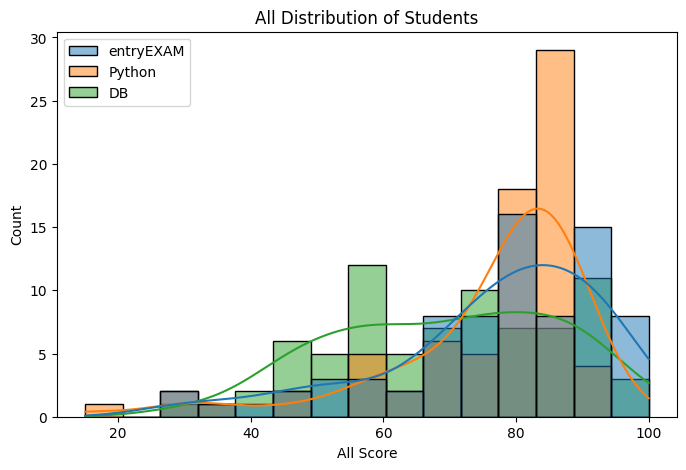

In [328]:
plt.figure(figsize=(8,5))
sns.histplot(df[["entryEXAM","Python","DB"]], bins=15, kde=True)
plt.title("All Distribution of Students")
plt.xlabel("All Score")
plt.ylabel("Count")
plt.show()